### Churn_Modelling

In [1]:
### Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# Read and understand dataset
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.shape

(10000, 14)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset.duplicated().sum()

0

#### Visualization


<ipython-input-6-5e502b34080e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


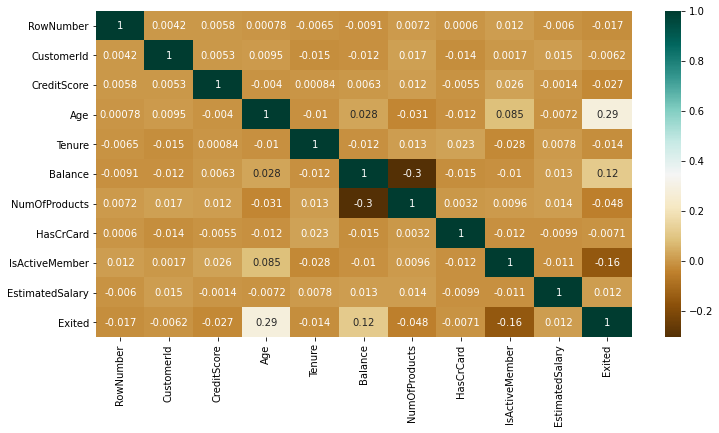

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),
            cmap='BrBG',
            annot=True)
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

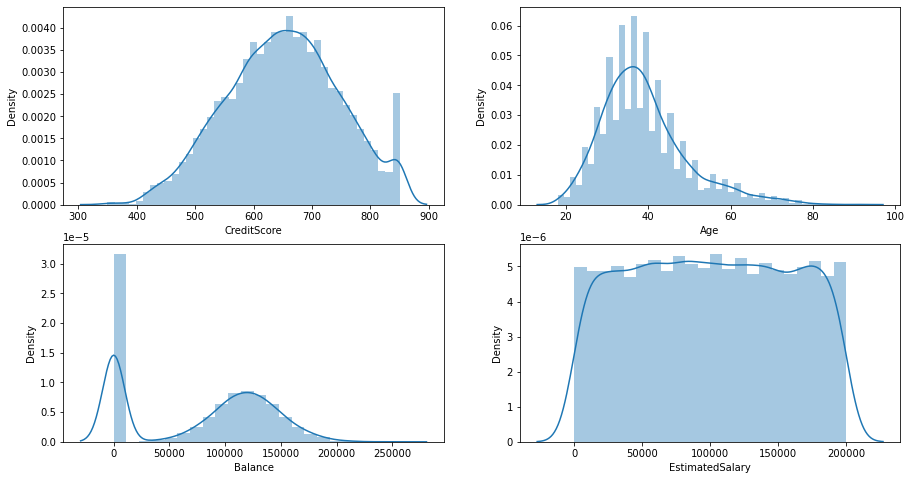

In [7]:
lis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.subplots(figsize=(15, 8))
index = 1
  
for i in lis:
    plt.subplot(2, 2, index)
    sns.distplot(dataset[i])
    index += 1
plt.show()   

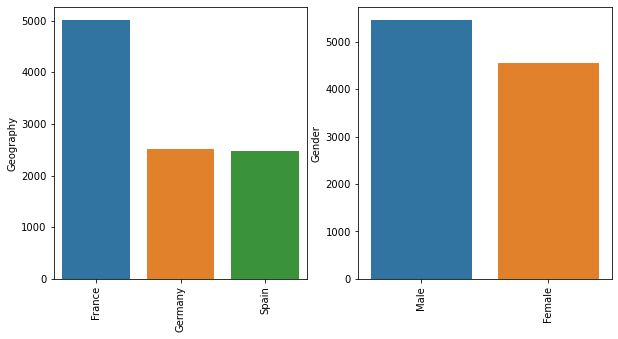

In [8]:
lis2 = ['Geography', 'Gender']
plt.subplots(figsize=(10, 5))
index = 1
  
for col in lis2:
    y = dataset[col].value_counts()
    plt.subplot(1, 2, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1
plt.show()

#### Dependend and independent features

**RowNumber,CustomerID,Name is not useful features**


In [9]:
X = dataset.iloc[:, 3:13]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y = dataset.iloc[:, 13:]
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


#### Feature Engineering

In [12]:
geo = pd.get_dummies(X['Geography'],drop_first = True)

In [13]:
X['Gender'] = X['Gender'].map({'Female': 0, 'Male': 1})

In [14]:
X.head(7)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71
6,822,France,1,50,7,0.00,2,1,1,10062.80


In [15]:
X = X.drop(['Geography'],axis=1)

In [16]:
X = pd.concat([X,geo],axis=1)
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [17]:
# Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

#### Model Building and Evaluation

#### Feature Engineering

In [18]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [19]:
X_tarin = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
9254,686,1,32,6,0.00,2,1,1,179093.26,0,0
1561,632,1,42,4,119624.60,2,1,1,195978.86,1,0
1670,559,1,24,3,114739.92,1,1,0,85891.02,0,1
6087,561,0,27,9,135637.00,1,1,0,153080.40,0,0
6669,517,1,56,9,142147.32,1,0,0,39488.04,0,0


In [21]:
X_test.shape,X_train.shape

((2000, 11), (8000, 11))

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import metrics
  
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()
nb = GaussianNB()
  
# making predictions on the training set
for clf in (rfc, knn, svc,lc,nb):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy score of ",clf.__class__.__name__,"=",
          100*metrics.accuracy_score(y_test, y_pred))
    print("Classification report of", clf.__class__.__name__, ":\n", classification_report(y_test, y_pred))

<ipython-input-22-99d8aaa2af20>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy score of  RandomForestClassifier = 33.5
Classification report of RandomForestClassifier :
               precision    recall  f1-score   support

           0       0.72      0.28      0.41      1607
           1       0.16      0.55      0.25       393

    accuracy                           0.34      2000
   macro avg       0.44      0.42      0.33      2000
weighted avg       0.61      0.34      0.37      2000

Accuracy score of  KNeighborsClassifier = 80.35
Classification report of KNeighborsClassifier :
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hitam/opt/an

Accuracy score of  SVC = 80.35
Classification report of SVC :
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

Accuracy score of  LogisticRegression = 65.64999999999999
Classification report of LogisticRegression :
               precision    recall  f1-score   support

           0       0.92      0.63      0.75      1607
           1       0.34      0.76      0.47       393

    accuracy                           0.66      2000
   macro avg       0.63      0.70      0.61      2000
weighted avg       0.80      0.66      0.69      2000

Accuracy score of  GaussianNB = 80.35
Classification report of GaussianNB :
               precision    recall  f1-score   support

           0       0.80      1.00      0.89   

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hitam/opt/an

<ipython-input-23-545e56e9037f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy score of  RandomForestClassifier = 33.5


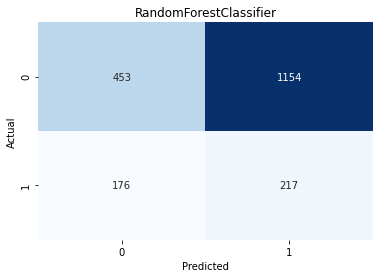

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy score of  KNeighborsClassifier = 80.35


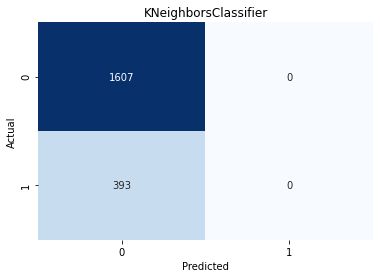

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy score of  SVC = 80.35


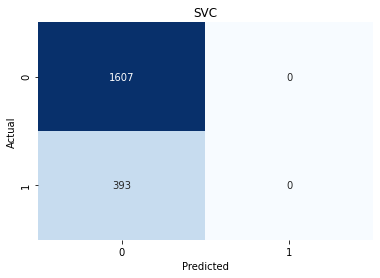

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy score of  LogisticRegression = 65.64999999999999


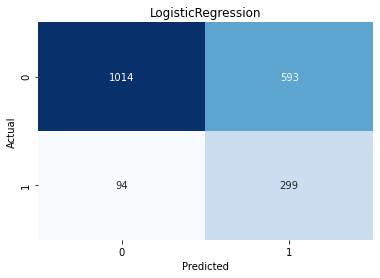

Accuracy score of  GaussianNB = 80.35


/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


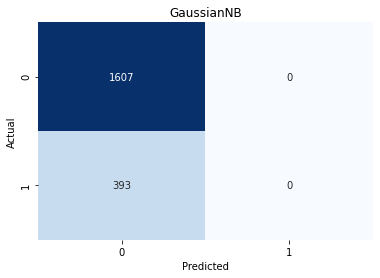

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

for clf in (rfc, knn, svc, lc,nb):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy score of ", clf.__class__.__name__,"=", 100*metrics.accuracy_score(y_test, y_pred))

    # Create confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using Matplotlib and Seaborn
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(clf.__class__.__name__)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU

In [25]:
model= Sequential()

In [26]:
model.add(Dense(11,activation="relu")) ## 11 features so units = 11,input layer
model.add(Dense(7,activation='relu')) ## 1st hidden layer
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu')) ## 2nd hidden 
model.add(Dropout(0.3))
model.add(Dense(11,activation='relu')) # 3rd hidden layer
model.add(Dense(1,activation='sigmoid')) # output layer

In [27]:
# Initiating model  -- by default learning rate = 0.01

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

### ANN (Trianing Neural Network)

In [28]:
# Earlystopping for stop when the model reaches high accuracy -- for code (keras documentation )
from tensorflow.keras.callbacks import EarlyStopping

stopping = EarlyStopping( monitor='val_loss',min_delta=0,patience=0,verbose=0,mode='auto', baseline=None,restore_best_weights=False,start_from_epoch=0)

In [29]:
model_history = model.fit(X_train,y_train,validation_split=0.23,batch_size= 50,epochs=60)

Epoch 1/60
124/124 [==============================] - 5s 11ms/step - loss: 782.1078 - accuracy: 0.6560 - val_loss: 179.2741 - val_accuracy: 0.7837
Epoch 2/60
124/124 [==============================] - 1s 9ms/step - loss: 192.3145 - accuracy: 0.6771 - val_loss: 49.5248 - val_accuracy: 0.7891
Epoch 3/60
124/124 [==============================] - 1s 7ms/step - loss: 73.6030 - accuracy: 0.6856 - val_loss: 15.4517 - val_accuracy: 0.7424
Epoch 4/60
124/124 [==============================] - 1s 6ms/step - loss: 31.4133 - accuracy: 0.6927 - val_loss: 5.2728 - val_accuracy: 0.7739
Epoch 5/60
124/124 [==============================] - 1s 5ms/step - loss: 15.5162 - accuracy: 0.7021 - val_loss: 3.0857 - val_accuracy: 0.7772
Epoch 6/60
124/124 [==============================] - 1s 6ms/step - loss: 7.9478 - accuracy: 0.7198 - val_loss: 1.7598 - val_accuracy: 0.7647
Epoch 7/60
124/124 [==============================] - 1s 8ms/step - loss: 5.1851 - accuracy: 0.7203 - val_loss: 1.1438 - val_accuracy: 0

In [30]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

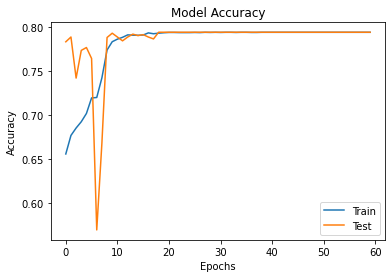

In [31]:
# plot summarize history for accuracy & val_score

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'],loc='best')
plt.show()

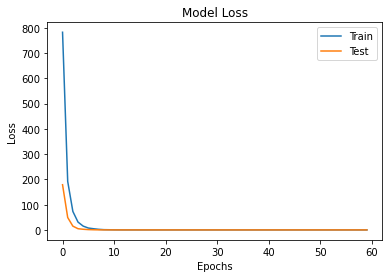

In [32]:
# plot summarize history for loss & val_loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'],loc='best')
plt.show()

In [33]:
## Prediction & Evaluation

y_pred = model.predict(X_test)
y_pred =np.where(y_pred > 0.5,1, 0)

63/63 [==============================] - 0s 2ms/step


In [34]:
## Evaluating 

from sklearn.metrics import  accuracy_score


In [36]:
score= accuracy_score(y_test,y_pred)
score

0.8035